<b>Name: Jonathan Lawrence<br/>
Date: 10/17/19<br/>
Assignment: Exercise 8.3 - [Dimensionality Reduction] Traffic Crashes in Chicago (10,000 incidents)<br/>
Data Source:</b> https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

# PART 1

<b>This study will analyze data from Chicago's last 10,000 vehicular crash reports to determine the factors that promote injury.</b>

In [1]:
import pandas as pd
import yellowbrick

<b>Load the data from the “Traffic_Crashes.csv” file into a DataFrame.</b><br/>
I've reduced the file size down to the first 10,000 incidents due to size constraints on loading and processing the data. I've also selected only the columns I am interested in.

In [2]:
addr1 = "Traffic_Crashes.csv" # data
fields = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'ROADWAY_SURFACE_COND', 'CRASH_TYPE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK']

data = pd.read_csv(addr1, usecols=fields) # Load data into a dataframe
data.columns = ['Speed Limit', 'Weather', 'Lighting', 'Road', 'Status', 'Hour', 'Day'] # rename columns to something readable
data.head(5)

,Speed Limit,Weather,Lighting,Road,Status,Hour,Day
0,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,0,7
1,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,23,6
2,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,23,6
3,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,INJURY AND / OR TOW DUE TO CRASH,23,6
4,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,INJURY AND / OR TOW DUE TO CRASH,22,6


In [3]:
#inspect the data
print("The dimension of the table is: ", data.shape) # check the dimension of the table
data.info()

The dimension of the table is:  (10000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Speed Limit    10000 non-null int64
Weather        10000 non-null object
Lighting       10000 non-null object
Road           10000 non-null object
Status         10000 non-null object
Hour           10000 non-null int64
Day            10000 non-null int64
dtypes: int64(3), object(4)
memory usage: 390.7+ KB


<b>Basic Statistics</b><br/>
For this study, I will be using the 'Status' variable for the “target” and the other variables will be the “features”.

Notable insights:
 - Most crashes occured at 30 mph

In [4]:
data.describe() # look at variables

,Speed Limit,Hour,Day
count,10000.000000,10000.000000,10000.000000
mean,28.587900,12.929100,4.161300
std,5.629835,5.559457,1.919284
min,0.000000,0.000000,1.000000
25%,30.000000,9.000000,3.000000
50%,30.000000,14.000000,4.000000
75%,30.000000,17.000000,6.000000
max,55.000000,23.000000,7.000000


<b>Data Wrangling</b><br/>
1) I dropped the rows with NaN or non-categorized variables<br/>
2) I decided to convert some columns to 'category' type for more efficient plotting

In [5]:
# drop rows with NaN or non-categorized values
data = data.dropna(how='any')
data = data[data.Weather != 'UNKNOWN']
data = data[data.Weather != 'OTHER']
data = data[data.Lighting != 'UNKNOWN']
data = data[data.Road != 'UNKNOWN']
data = data[data.Road != 'OTHER']

# Function to print number of unique counts
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

print("Unique counts\n\n", unique_counts)

# Decided to change all columns except "POSTED_SPEED_LIMIT" to 'category' type

for col in ['Weather', 'Lighting', 'Road']:
    data[col] = data[col].astype('category')

print(data.info())
print("The dimension of the table is: ", data.shape)
data.head(5)

Unique counts

    Column_Name  Num_Unique
4       Status           2
2     Lighting           5
3         Road           5
6          Day           7
1      Weather           8
0  Speed Limit          15
5         Hour          24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9252 entries, 0 to 9998
Data columns (total 7 columns):
Speed Limit    9252 non-null int64
Weather        9252 non-null category
Lighting       9252 non-null category
Road           9252 non-null category
Status         9252 non-null object
Hour           9252 non-null int64
Day            9252 non-null int64
dtypes: category(3), int64(3), object(1)
memory usage: 352.8+ KB
None
The dimension of the table is:  (9252, 7)


,Speed Limit,Weather,Lighting,Road,Status,Hour,Day
0,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,0,7
1,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,23,6
2,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO INJURY / DRIVE AWAY,23,6
3,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,INJURY AND / OR TOW DUE TO CRASH,23,6
4,30,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,INJURY AND / OR TOW DUE TO CRASH,22,6


<b>Histograms of Numerical Features</b><br/>
These graphs reveal the following:
 - The likelihood of a crash occurring grows very slightly with the increase in speed limit, until 30 mph where a vast majority of crashes occur, then it drops off significantly. Given this information, we cannot assume that 30 mph is inherently more prone to crashes, because we do not know if there are an evenly distributed number of roads for with each speed limit. It is possible that most roads in Chicago are 30 mph.
 - Crashes occur more frequently during the daytime hours, especially during rush hour traffic between the hours of 7-8 (7-8am) and 15-17 (4-6pm).


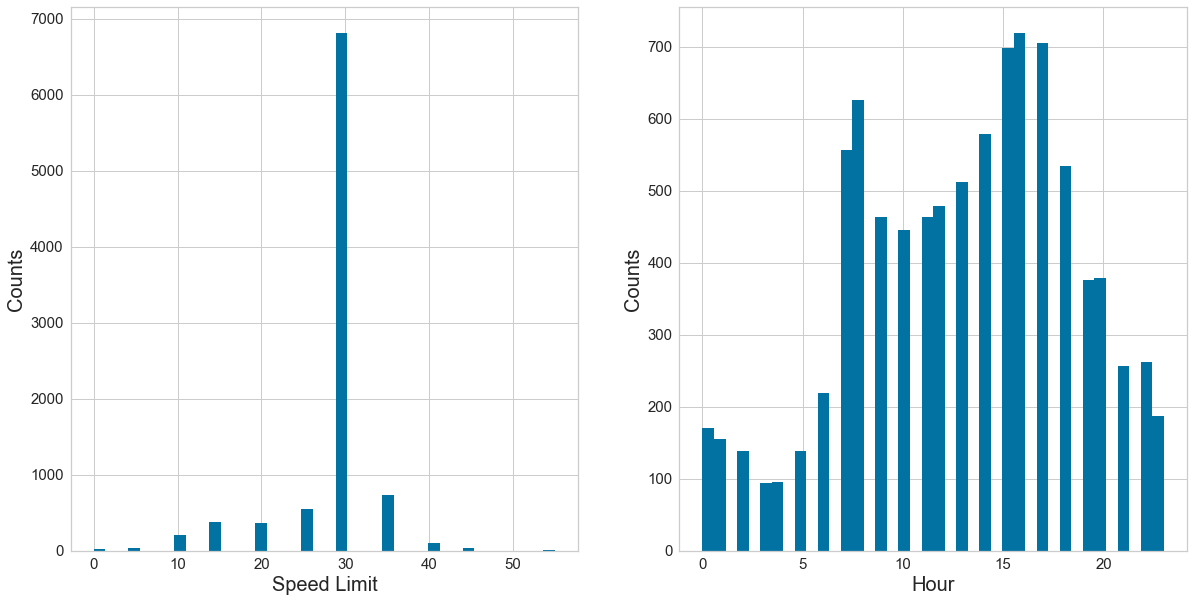

In [6]:
import matplotlib.pyplot as plt # import visulization packages

plt.rcParams['figure.figsize'] = (20, 10) # set up the figure size

fig, axes = plt.subplots(nrows = 1, ncols = 2) # make subplots

num_features = ['Speed Limit', 'Hour'] # Specify the features of interest
xaxes = num_features
yaxes = ['Counts', 'Counts']

axes = axes.ravel() # draw histograms of feature vs count
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

<b>Bar Charts</b><br/>
These charts reveal the following:
 - Most crashes occur without injury.
 - Most crashes occur during clear weather.
 - Most crashes occur during daylight.
 - Most crashes occur on dry roads.
 - The chance of being involved in a crash is higher as the week days go on, then goes down during the weekend.

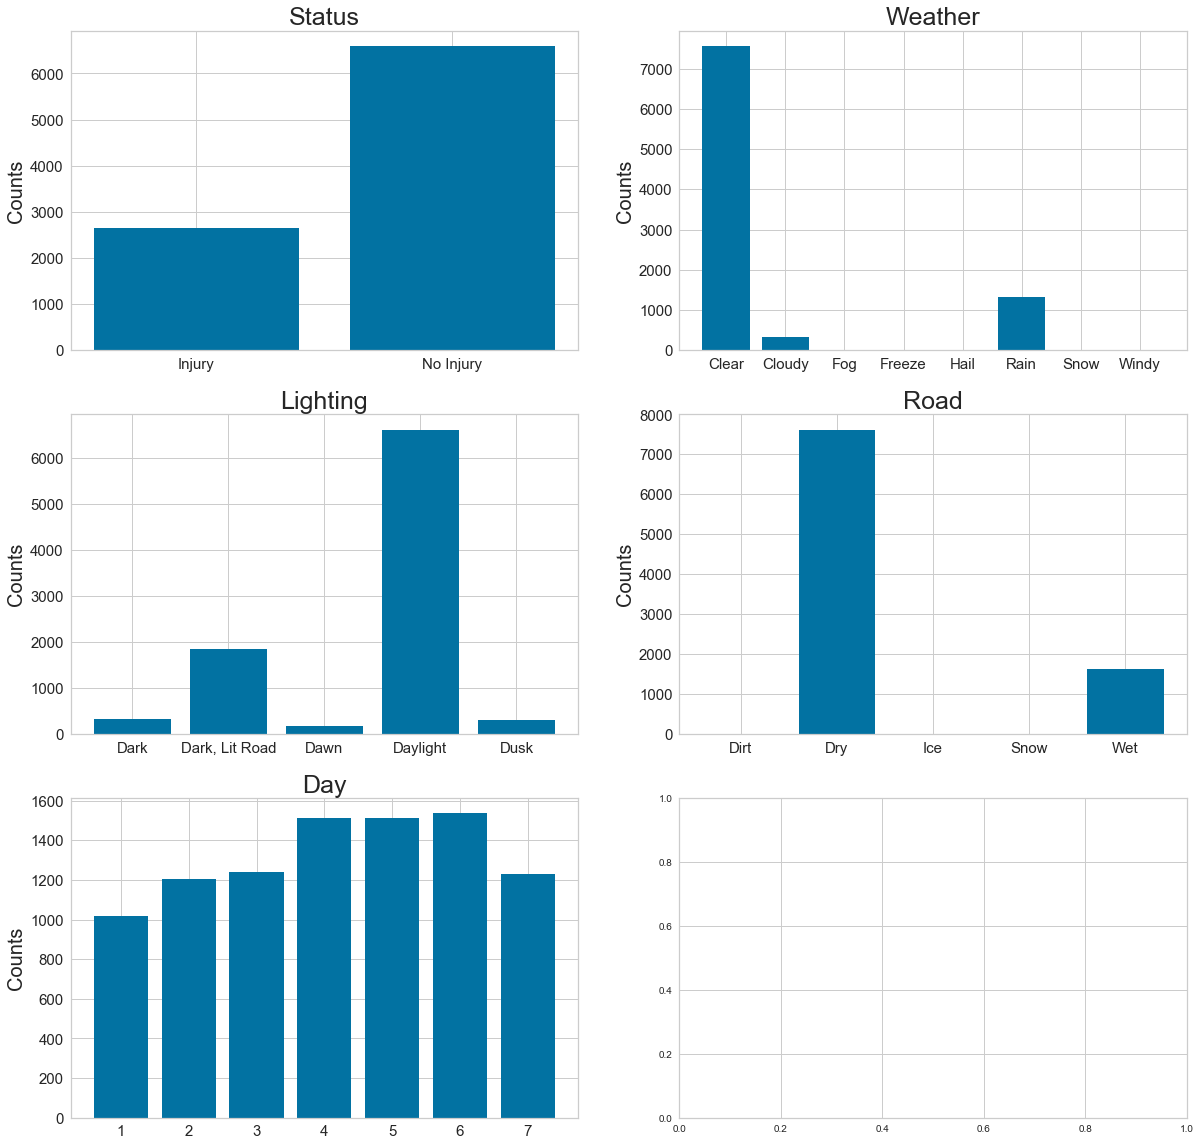

In [7]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20) # Barcharts: set up the figure size

fig, axes = plt.subplots(nrows = 3, ncols = 2) # make subplots

## Status

# make the data read to feed into the visulizer
X_Survived = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).groupby('Status').size().reset_index(name='Counts')['Status']
Y_Survived = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).groupby('Status').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Status', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

## Weather

# make the data read to feed into the visulizer
X_Embarked = data.replace({'Weather': {'CLEAR': 'Clear', 'CLOUDY/OVERCAST': 'Cloudy', 'FOG/SMOKE/HAZE': 'Fog', 'SNOW': 'Snow', 'RAIN': 'Rain', 'SEVERE CROSS WIND GATE': 'Windy', 'SLEET/HAIL': 'Hail', 'FREEZING RAIN/DRIZZLE': 'Freeze'}}).groupby('Weather').size().reset_index(name='Counts')['Weather']
Y_Embarked = data.replace({'Weather': {'CLEAR': 'Clear', 'CLOUDY/OVERCAST': 'Cloudy', 'FOG/SMOKE/HAZE': 'Fog', 'SNOW': 'Snow', 'RAIN': 'Rain', 'SEVERE CROSS WIND GATE': 'Windy', 'SLEET/HAIL': 'Hail', 'FREEZING RAIN/DRIZZLE': 'Freeze'}}).groupby('Weather').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Embarked, Y_Embarked)
axes[0, 1].set_title('Weather', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

## Lighting

# make the data read to feed into the visulizer
X_Embarked = data.replace({'Lighting': {'DARKNESS, LIGHTED ROAD': 'Dark, Lit Road', 'DARKNESS': 'Dark', 'DUSK': 'Dusk', 'DAYLIGHT': 'Daylight', 'DAWN': 'Dawn'}}).groupby('Lighting').size().reset_index(name='Counts')['Lighting']
Y_Embarked = data.replace({'Lighting': {'DARKNESS, LIGHTED ROAD': 'Dark, Lit Road', 'DARKNESS': 'Dark', 'DUSK': 'Dusk', 'DAYLIGHT': 'Daylight', 'DAWN': 'Dawn'}}).groupby('Lighting').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Embarked, Y_Embarked)
axes[1, 0].set_title('Lighting', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

## Road

# make the data read to feed into the visulizer
X_Embarked = data.replace({'Road': {'DRY': 'Dry', 'ICE': 'Ice', 'SNOW OR SLUSH': 'Snow', 'SAND, MUD, DIRT': 'Dirt', 'WET': 'Wet'}}).groupby('Road').size().reset_index(name='Counts')['Road']
Y_Embarked = data.replace({'Road': {'DRY': 'Dry', 'ICE': 'Ice', 'SNOW OR SLUSH': 'Snow', 'SAND, MUD, DIRT': 'Dirt', 'WET': 'Wet'}}).groupby('Road').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Road', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

## Day

# make the data read to feed into the visulizer
X_Embarked = data.groupby('Day').size().reset_index(name='Counts')['Day']
Y_Embarked = data.groupby('Day').size().reset_index(name='Counts')['Counts']
# make the bar plot
#order = ['Sunday', 'Monday', 'Tuesday', 'Wedsday','Thursday','Friday','Saturday']
#data.set_index('Day').loc[order].groupby('Day').plot(kind='bar')
axes[2, 0].bar(X_Embarked, Y_Embarked)
axes[2, 0].set_title('Day', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

plt.show()

<b>Pearson Ranking</b><br/>
This heatmap reveals:
 - There is sone positive correlation but it is very small.

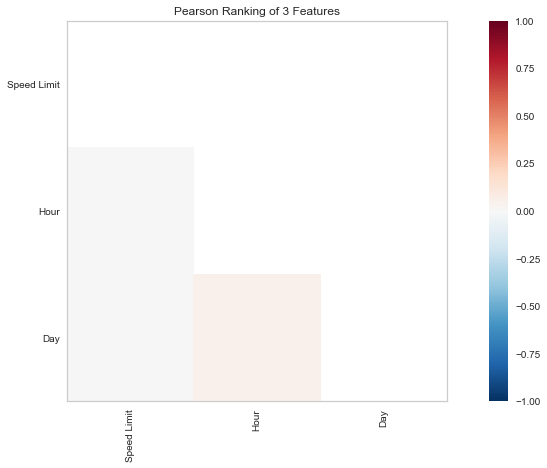

In [8]:
feature_columns = ["Speed Limit", "Hour", "Day"]

import numpy as np
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[feature_columns].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=feature_columns, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="C:\\Users\\Jonathan\\Desktop\\Master\'s Stuff\\Master\'s Program\\DSC550-T301 Data Mining\\Week 6\pcoords1.png") # Draw/show/poof the data
plt.show()

<b>Parallel Coordinates visualization</b><br/>
This visualization reveals:
 - Crashes that occurred at slower speeds had a lower chance of injury.
 - Crashes that occurred in the earlier and later hours of the day had a higher chance of injury.


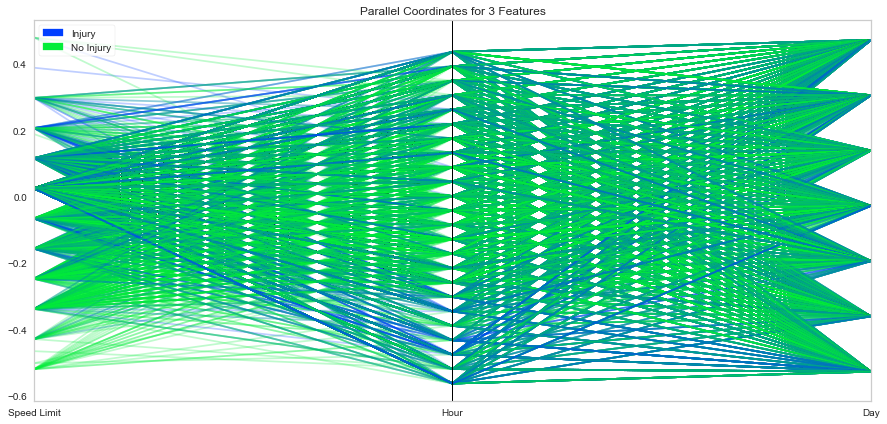

In [9]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Injury', 'No Injury']
num_features = ["Speed Limit", "Hour", "Day"]

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Status.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.show()
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show()

<b>Stack Bar Charts</b><br/>
Most accidents resulted in injury regardless of the weather, lighting, road type, or day of the week.

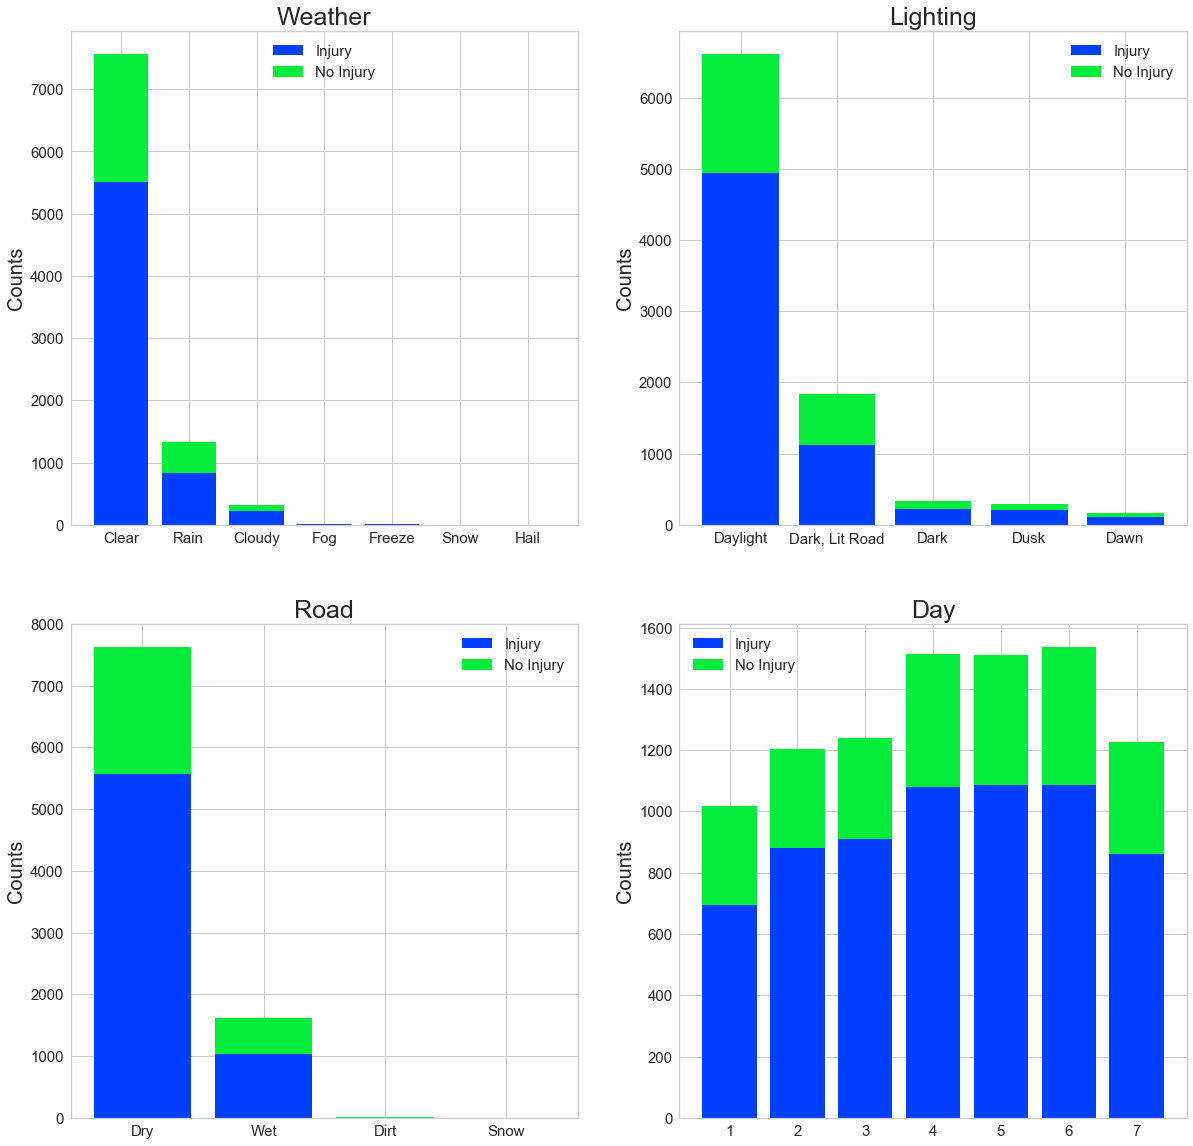

In [10]:
# Step 10 - stacked bar charts to compare survived/not survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

## Weather.replace({'Lighting': {1: '1st', 2: '2nd', 3: '3rd'}})

# make the data read to feed into the visulizer
Weather_no_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Weather': {'CLEAR': 'Clear', 'CLOUDY/OVERCAST': 'Cloudy', 'FOG/SMOKE/HAZE': 'Fog', 'SNOW': 'Snow', 'RAIN': 'Rain', 'SEVERE CROSS WIND GATE': 'Windy', 'SLEET/HAIL': 'Hail', 'FREEZING RAIN/DRIZZLE': 'Freeze'}})[data['Status']=="NO INJURY / DRIVE AWAY"]['Weather'].value_counts()
Weather_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Weather': {'CLEAR': 'Clear', 'CLOUDY/OVERCAST': 'Cloudy', 'FOG/SMOKE/HAZE': 'Fog', 'SNOW': 'Snow', 'RAIN': 'Rain', 'SEVERE CROSS WIND GATE': 'Windy', 'SLEET/HAIL': 'Hail', 'FREEZING RAIN/DRIZZLE': 'Freeze'}})[data['Status']=="INJURY AND / OR TOW DUE TO CRASH"]['Weather'].value_counts()
Weather_injury = Weather_injury.reindex(index = Weather_no_injury.index)
# make the bar plot
p1 = axes[0, 0].bar(Weather_no_injury.index, Weather_no_injury.values)
p2 = axes[0, 0].bar(Weather_injury.index, Weather_injury.values, bottom=Weather_no_injury.values)
axes[0, 0].set_title('Weather', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Injury', 'No Injury'), fontsize = 15)

## Lighting

# make the data read to feed into the visualizer
Lighting_no_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Lighting': {'DARKNESS, LIGHTED ROAD': 'Dark, Lit Road', 'DARKNESS': 'Dark', 'DUSK': 'Dusk', 'DAYLIGHT': 'Daylight', 'DAWN': 'Dawn'}})[data['Status']=="NO INJURY / DRIVE AWAY"]['Lighting'].value_counts()
Lighting_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Lighting': {'DARKNESS, LIGHTED ROAD': 'Dark, Lit Road', 'DARKNESS': 'Dark', 'DUSK': 'Dusk', 'DAYLIGHT': 'Daylight', 'DAWN': 'Dawn'}})[data['Status']=="INJURY AND / OR TOW DUE TO CRASH"]['Lighting'].value_counts()
Lighting_injury = Lighting_injury .reindex(index = Lighting_injury.index)
# make the bar plot
p3 = axes[0, 1].bar(Lighting_no_injury.index, Lighting_no_injury.values)
p4 = axes[0, 1].bar(Lighting_injury.index, Lighting_injury.values, bottom=Lighting_no_injury.values)
axes[0, 1].set_title('Lighting', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Injury', 'No Injury'), fontsize = 15)

## Road

# make the data read to feed into the visualizer
Road_no_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Road': {'DRY': 'Dry', 'ICE': 'Ice', 'SNOW OR SLUSH': 'Snow', 'SAND, MUD, DIRT': 'Dirt', 'WET': 'Wet'}})[data['Status']=="NO INJURY / DRIVE AWAY"]['Road'].value_counts()
Road_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}}).replace({'Road': {'DRY': 'Dry', 'ICE': 'Ice', 'SNOW OR SLUSH': 'Snow', 'SAND, MUD, DIRT': 'Dirt', 'WET': 'Wet'}})[data['Status']=="INJURY AND / OR TOW DUE TO CRASH"]['Road'].value_counts()
Road_injury = Road_injury.reindex(index = Road_no_injury.index)
# make the bar plot
p5 = axes[1, 0].bar(Road_no_injury.index, Road_no_injury.values)
p6 = axes[1, 0].bar(Road_injury.index, Road_injury.values, bottom=Road_no_injury.values)
axes[1, 0].set_title('Road', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Injury', 'No Injury'), fontsize = 15)

## Day

# make the data read to feed into the visualizer
Day_no_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}})[data['Status']=="NO INJURY / DRIVE AWAY"]['Day'].value_counts()
Day_injury = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}})[data['Status']=="INJURY AND / OR TOW DUE TO CRASH"]['Day'].value_counts()
Day_injury = Day_injury.reindex(index = Day_no_injury.index)
# make the bar plot
p7 = axes[1, 1].bar(Day_no_injury.index, Day_no_injury.values)
p8 = axes[1, 1].bar(Day_injury.index, Day_injury.values, bottom=Day_no_injury.values)
axes[1, 1].set_title('Day', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Injury', 'No Injury'), fontsize = 15)

plt.show()

# PART 2<br/>
<b>Feature Reduction:</b> I already reduced the data by several features before starting Part 1. I had removed a majority of the columns because they were not useful, like RD_NO, CRASH_DATE, FIRST_CRASH_TYPE, etc.<br/>

<b>Missing Values:</b> I also removed all rows with missing values prior to starting Part 1, so there are none to fill in here.

<b>Eliminate Features:</b>
This is the moment when I would normally take the log transformation of any skewed, ordinal variables. However, the only ordinal variable I am considering is 'Speed Limit' and from the histogram it appears to be normally distributed, and not skewed. So no log transformation is needed here.

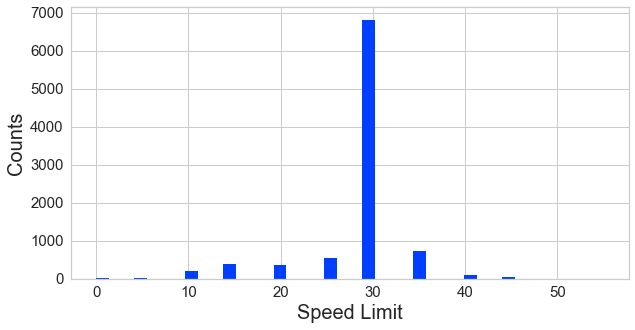

In [11]:
# Histogram of 'Speed Limit'
plt.rcParams['figure.figsize'] = (10, 5)
plt.tight_layout()

plt.hist(data['Speed Limit'], bins = 40)
plt.xlabel('Speed Limit', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

<b>Convert categorical data to numbers</b><br/>
Here we've used one-hot encoding to convert the categorical variables to 1's and 0's. None of the values are ordinal. I created a new column for each category and assigned a value of 1 or 0. This has made our inputs easier to use for machine learning algorithms. Also, none of the categories are multicolinear, so we don't have to remove any columns to avoid the dummy variable trap.

In [12]:
#get the categorical data
cat_features = ['Weather', 'Lighting', "Road"] # List of categorical features
data_cat = data[cat_features] # Select categorical features

# Replace string values with numerical values
data_cat = data_cat.replace({'Weather': {'CLEAR': 'Clear', 'CLOUDY/OVERCAST': 'Cloudy', 'FOG/SMOKE/HAZE': 'Fog', 'SNOW': 'Snow', 'RAIN': 'Rain', 'SEVERE CROSS WIND GATE': 'Windy', 'SLEET/HAIL': 'Hail', 'FREEZING RAIN/DRIZZLE': 'Freeze'}})
data_cat = data_cat.replace({'Lighting': {'DARKNESS, LIGHTED ROAD': 'Dark, Lit Road', 'DARKNESS': 'Dark', 'DUSK': 'Dusk', 'DAYLIGHT': 'Daylight', 'DAWN': 'Dawn'}})
data_cat = data_cat.replace({'Road': {'DRY': 'Dry', 'ICE': 'Ice', 'SNOW OR SLUSH': 'Snow', 'SAND, MUD, DIRT': 'Dirt', 'WET': 'Wet'}})
data_cat = data_cat.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}})

# One Hot Encoding
data_cat_dummies = pd.get_dummies(data_cat) # Convert categorical variable into dummy/indicator variables.

# check the data
data_cat_dummies.head(8)

,Weather_Clear,Weather_Cloudy,Weather_Fog,Weather_Freeze,Weather_Hail,Weather_Rain,Weather_Snow,Weather_Windy,Lighting_Dark,"Lighting_Dark, Lit Road",Lighting_Dawn,Lighting_Daylight,Lighting_Dusk,Road_Dirt,Road_Dry,Road_Ice,Road_Snow,Road_Wet
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


# PART 3

14. Create a whole features dataset that can be used for train and validation data splitting

In [22]:
# here we will combine the numerical features and the dummie features together
features_model = ['Speed Limit', 'Hour', 'Day']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'Status': {'INJURY AND / OR TOW DUE TO CRASH': 'Injury', 'NO INJURY / DRIVE AWAY': 'No Injury'}})['Status']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of injured and not injured in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of injured and not injured in the validation set:')
print(y_val.value_counts())

# Split the data into training and validation sets

No. of samples in training set:  6476
No. of samples in validation set: 2776


No. of injured and not injured in the training set:
No Injury    4611
Injury       1865
Name: Status, dtype: int64


No. of injured and not injured in the validation set:
No Injury    1988
Injury        788
Name: Status, dtype: int64


<b>Step 15 - Eval Metrics</b><br/>
In this step I've trained all of the methods I'm interested in with the training data, and then tested each method on the testing set, so that I could have the machine learning algorithm predict people with and without injury.<br/><br/>
The results show that there are 15 true positives (top-left) for having an injury, that were correctly identified by the algorithm. Alternatively, there were 773 false negatives (top-right) who sustained an injury but the algorithm said they didn't. There were 19 false positives (bottom-left) who did not sustain an injury but the algorithm said they did. Lastly, there were 1,969 true negatives (bottom-right) that did not sustain an injury and the algorithm correctly identified them.

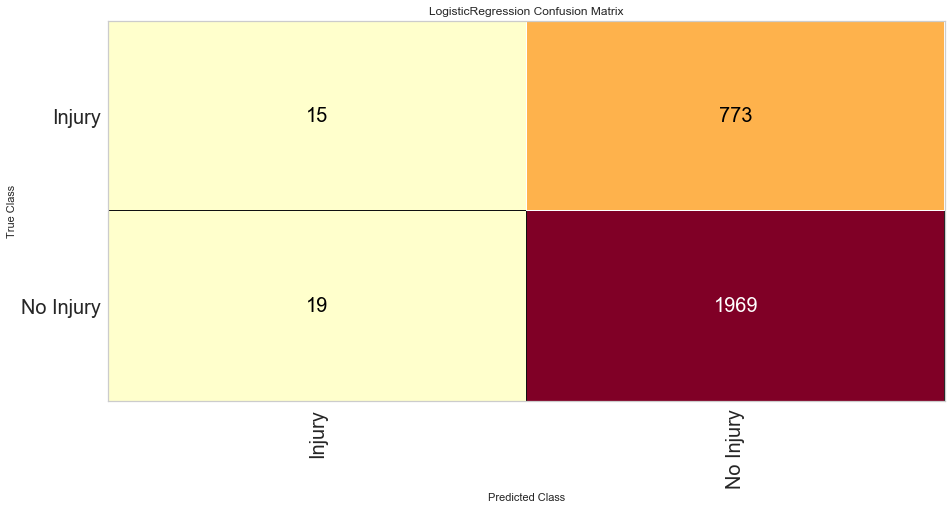

In [29]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['Injury','No Injury']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

<b>Precision, Recall, and F1 Score</b><br/>
When you build a model to make predictions, you need a way to measure how accurate the predictions are.<br/>
<b>Precision</b>: A model has high precision if it avoids mistakes in predicting Injury's as No Injury's.
<b>Recall</b>: A model has high recall if it avoids mistakes in predicting No Injury's as Injury's.
<b>F1</b>: F1 scores on a balance of Precision and Recall so that your model isn't broken 


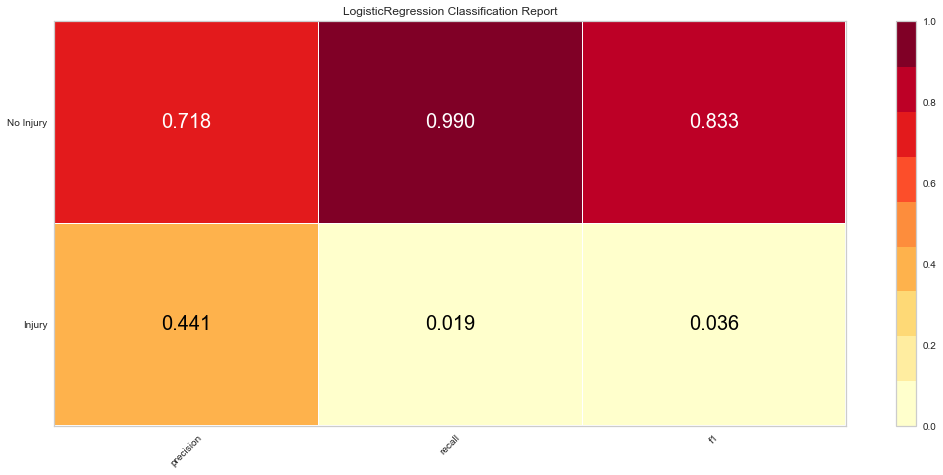

In [28]:
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

<b>ROC and AUC</b><br/>
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve. 

In the ROC curve, we are plotting the difference between the True Positive Rate (percentage of your data points correctly identified as positive) against the False Positive Rate (false identified as positives). From this graph it is apparent that the ROC of Injury and No Injury are mostly the same, and that the values are good but not exceedingly good. The closer the lines are to the top-left of the graph (True Positive with little False Positive) the better.

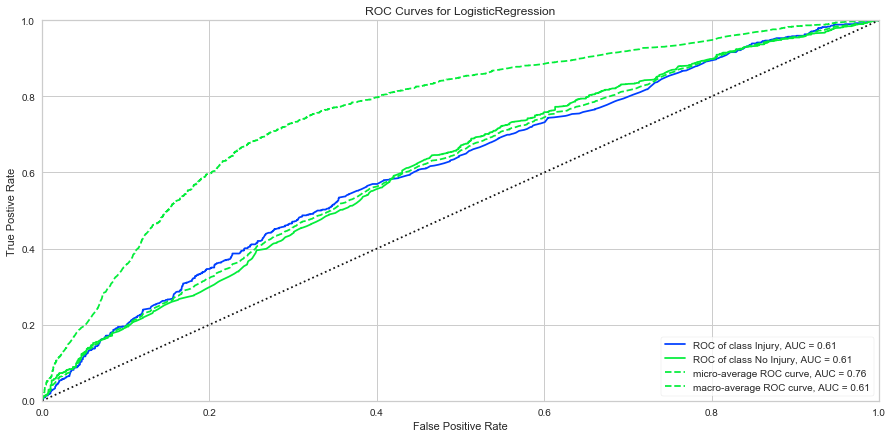

In [16]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()